In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [4]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


In [5]:
# 결측치 확인
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

<Axes: xlabel='activity', ylabel='count'>

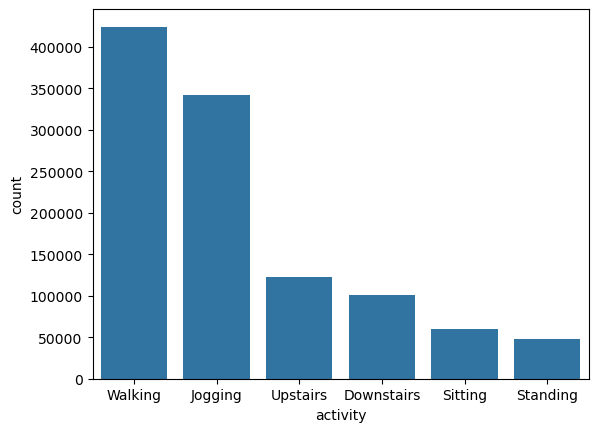

In [7]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_19990/2290427979.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="user_id", data=df, palette=[sns.color_palette()[0]],
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_19990/2290427979.py:1: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="user_id", data=df, palette=[sns.color_palette()[0]],


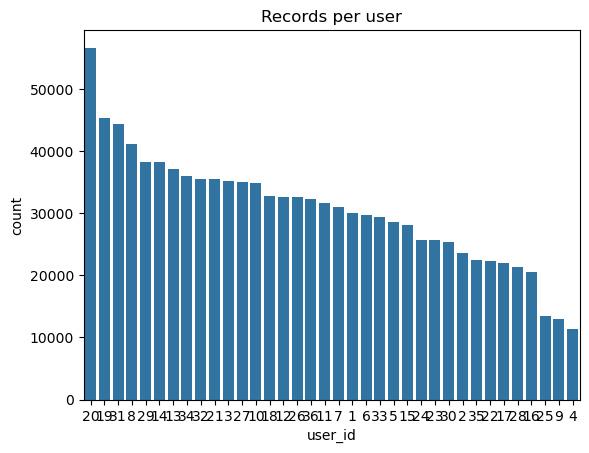

<Figure size 10000x3000 with 0 Axes>

In [8]:
sns.countplot(x="user_id", data=df, palette=[sns.color_palette()[0]],
              order=df['user_id'].value_counts().index)
plt.title("Records per user")
plt.figure(figsize=(100, 30))
plt.show()

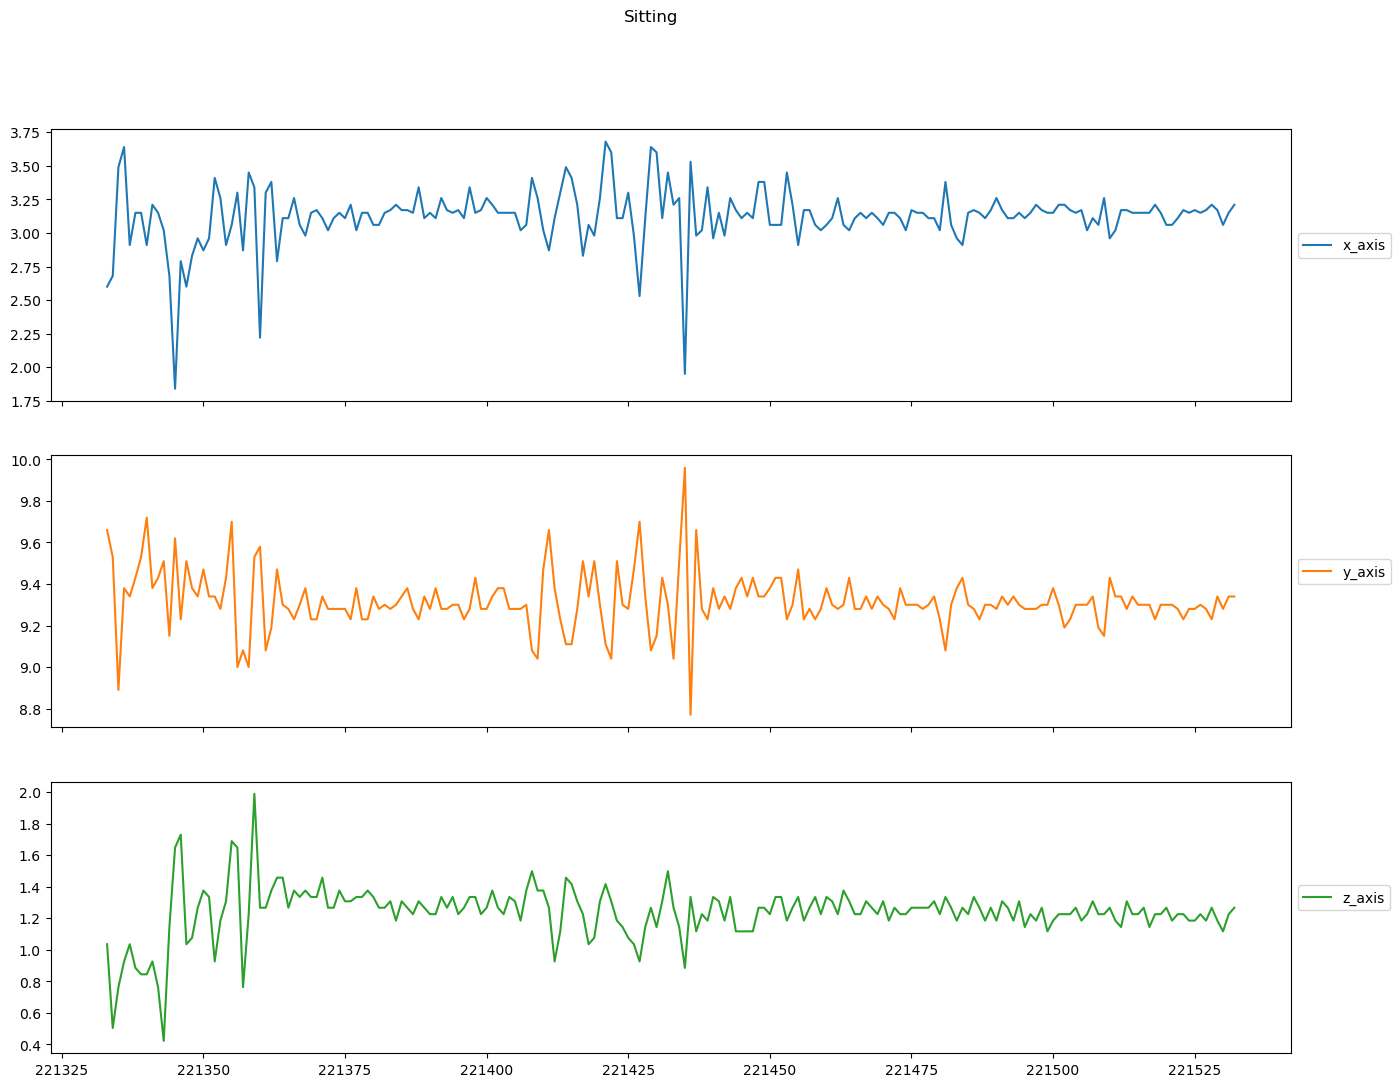

In [9]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Sitting", df)

In [10]:
from sklearn.preprocessing import RobustScaler

scale_columns = ["x_axis", "y_axis", "z_axis"]

scaler = RobustScaler()

scaler = scaler.fit(df[scale_columns])

df.loc[:, scale_columns] = scaler.transform(df[scale_columns].to_numpy())
df

/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.131961,0.566215,0.102015,1
1,33,Jogging,49106062271000,0.648740,0.397381,0.193001,1
2,33,Jogging,49106112167000,0.633834,0.351926,-0.016543,1
3,33,Jogging,49106222305000,-0.120782,1.259408,0.612089,1
4,33,Jogging,49106332290000,-0.199038,0.498032,1.458535,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,1.194254,-1.132300,0.342105,4
1098199,19,Sitting,131623371431000,1.199726,-1.119190,0.350202,4
1098200,19,Sitting,131623411592000,1.205198,-1.109654,0.342105,4
1098201,19,Sitting,131623491487000,1.194254,-1.119190,0.350202,4


In [11]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [12]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [13]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)


(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [14]:
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

# CNN2 - LSTM1(Standard)

In [15]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro


2024-05-01 01:38:25.629610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-01 01:38:25.630790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           640       
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 196, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [17]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 01:38:31.795229: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-01 01:38:32.807448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:38:33.029840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:38:33.790225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7383 - accuracy: 0.7392

2024-05-01 01:38:51.028954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:38:51.105830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 62ms/step - loss: 0.7383 - accuracy: 0.7392 - val_loss: 0.7446 - val_accuracy: 0.6979
Epoch 2/20
275/275 [==============================] - 12s 45ms/step - loss: 0.4897 - accuracy: 0.8258 - val_loss: 0.4714 - val_accuracy: 0.8201
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3652 - accuracy: 0.8609 - val_loss: 0.3705 - val_accuracy: 0.8611
Epoch 4/20
275/275 [==============================] - 12s 45ms/step - loss: 0.3028 - accuracy: 0.8788 - val_loss: 0.3914 - val_accuracy: 0.8452
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2635 - accuracy: 0.8965 - val_loss: 0.2744 - val_accuracy: 0.8912
Epoch 6/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2434 - accuracy: 0.9081 - val_loss: 0.3691 - val_accuracy: 0.8843
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2009 - accuracy: 0.9302 - val_loss: 0.2619 - val_accuracy: 0.9055
Epo

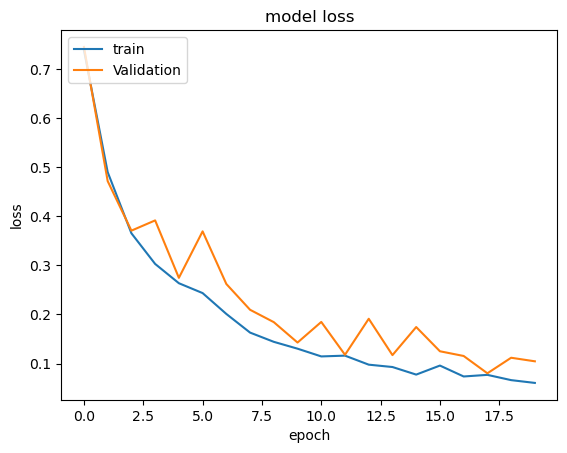

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

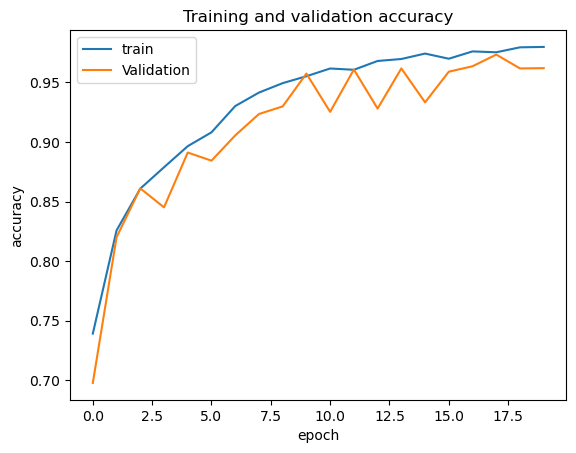

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 01:53:41.310986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:53:41.381097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.96113149747918
0.9608450191222
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       0.99      0.99      0.99      1710
           2       0.95      0.83      0.88       614
           3       0.80      0.97      0.88       502
           4       0.90      0.97      0.93       300
           5       0.95      0.87      0.91       242

    accuracy                           0.96      5491
   macro avg       0.93      0.93      0.93      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

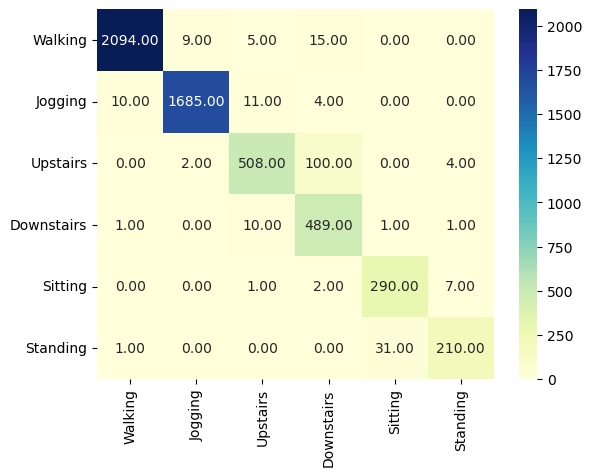

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# dense 2 blocks

In [22]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_5 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_4 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                      

In [23]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 01:55:35.279344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:55:35.470252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:55:36.137372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7502 - accuracy: 0.7280

2024-05-01 01:55:53.930307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 01:55:54.008792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 22s 64ms/step - loss: 0.7502 - accuracy: 0.7280 - val_loss: 0.8336 - val_accuracy: 0.7653
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.4733 - accuracy: 0.8332 - val_loss: 0.5285 - val_accuracy: 0.7930
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3654 - accuracy: 0.8601 - val_loss: 0.2880 - val_accuracy: 0.8923
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3236 - accuracy: 0.8732 - val_loss: 0.3197 - val_accuracy: 0.8693
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2665 - accuracy: 0.8894 - val_loss: 0.2684 - val_accuracy: 0.8955
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2600 - accuracy: 0.8952 - val_loss: 0.2601 - val_accuracy: 0.8932
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2316 - accuracy: 0.9130 - val_loss: 0.2368 - val_accuracy: 0.9082
Epo

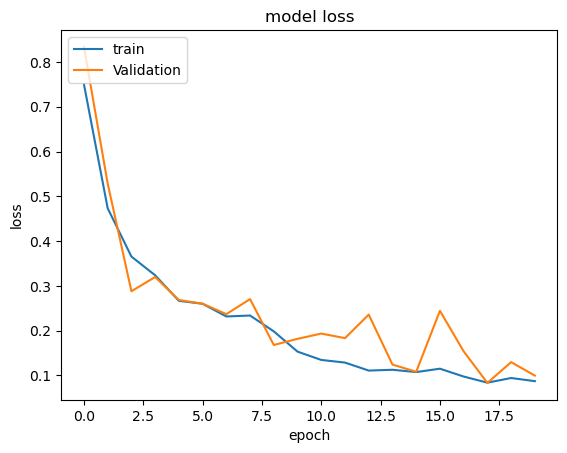

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

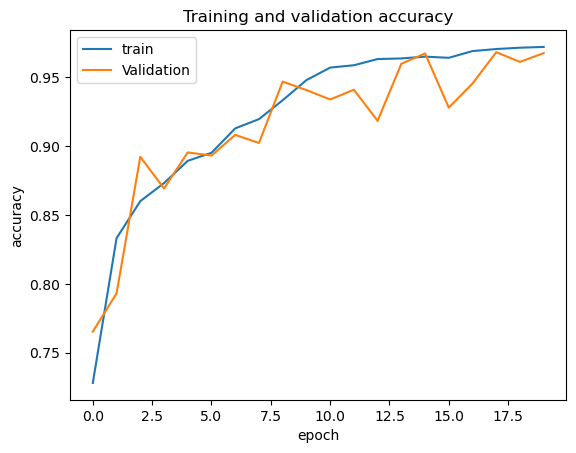

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 02:00:08.907429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:00:08.976870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9729085788298877
0.9726825714806047
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.91      0.92      0.91       614
           3       0.89      0.94      0.92       502
           4       0.98      0.96      0.97       300
           5       0.95      1.00      0.97       242

    accuracy                           0.97      5491
   macro avg       0.95      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

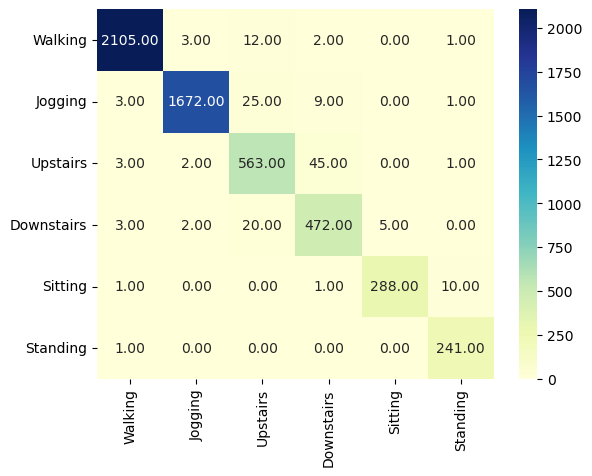

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# dense 3 blocks

In [27]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_7 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_6 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                      

In [28]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 02:01:08.631900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:01:08.827473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:01:09.519141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.8064 - accuracy: 0.7079

2024-05-01 02:01:27.534547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:01:27.617563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.8064 - accuracy: 0.7079 - val_loss: 0.5662 - val_accuracy: 0.7978
Epoch 2/20
275/275 [==============================] - 13s 47ms/step - loss: 0.4472 - accuracy: 0.8307 - val_loss: 0.3542 - val_accuracy: 0.8625
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3969 - accuracy: 0.8512 - val_loss: 0.3767 - val_accuracy: 0.8597
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3202 - accuracy: 0.8754 - val_loss: 0.2720 - val_accuracy: 0.8841
Epoch 5/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2982 - accuracy: 0.8827 - val_loss: 0.4070 - val_accuracy: 0.8648
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2810 - accuracy: 0.8863 - val_loss: 0.4185 - val_accuracy: 0.8593
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.2653 - accuracy: 0.8943 - val_loss: 0.2949 - val_accuracy: 0.8857
Epo

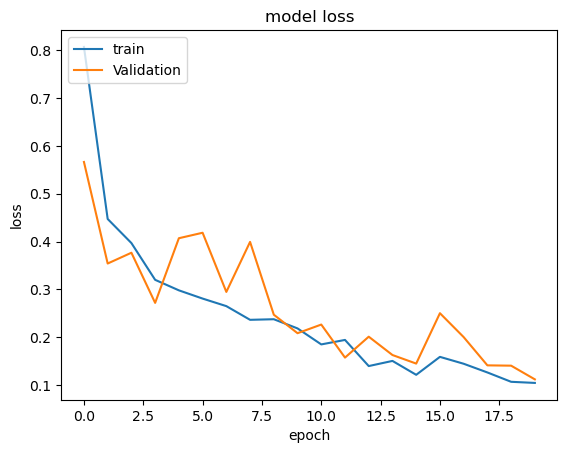

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

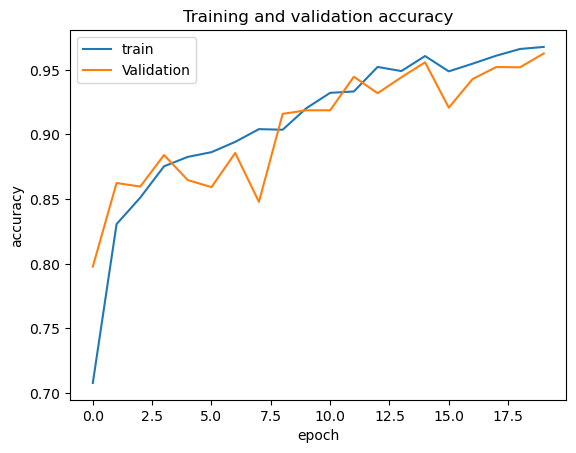

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 02:06:36.294854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:06:36.363425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9677886797501095
0.9674012019668549
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.83      0.97      0.90       614
           3       0.94      0.84      0.89       502
           4       1.00      0.95      0.97       300
           5       0.94      0.99      0.96       242

    accuracy                           0.97      5491
   macro avg       0.95      0.95      0.95      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

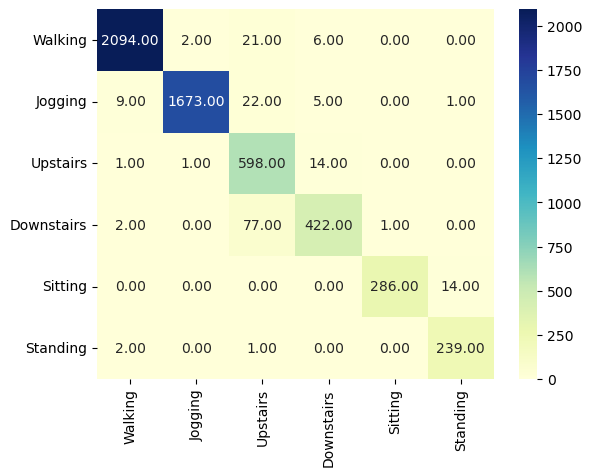

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [32]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_9 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_8 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                      

In [33]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 02:08:02.595688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:08:02.790286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:08:03.510460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.7396

2024-05-01 02:08:21.614902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:08:21.700101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 66ms/step - loss: 0.7133 - accuracy: 0.7396 - val_loss: 0.4600 - val_accuracy: 0.8463
Epoch 2/20
275/275 [==============================] - 13s 49ms/step - loss: 0.4316 - accuracy: 0.8403 - val_loss: 0.4189 - val_accuracy: 0.8379
Epoch 3/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3618 - accuracy: 0.8607 - val_loss: 0.2911 - val_accuracy: 0.8880
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.3001 - accuracy: 0.8770 - val_loss: 0.2497 - val_accuracy: 0.8900
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2899 - accuracy: 0.8827 - val_loss: 0.3132 - val_accuracy: 0.8766
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2760 - accuracy: 0.8908 - val_loss: 0.2327 - val_accuracy: 0.8991
Epoch 7/20
275/275 [==============================] - 13s 48ms/step - loss: 0.2316 - accuracy: 0.9025 - val_loss: 0.2268 - val_accuracy: 0.9041
Epo

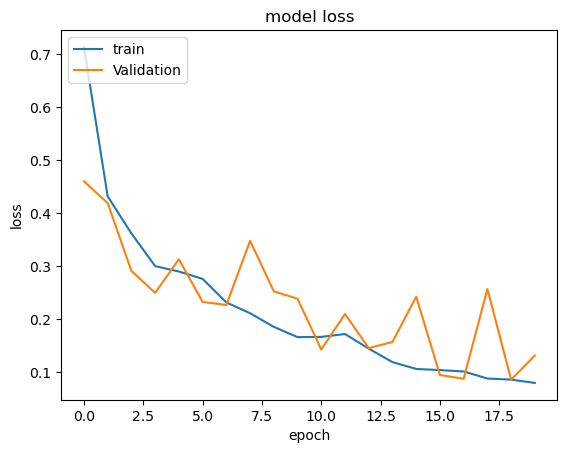

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

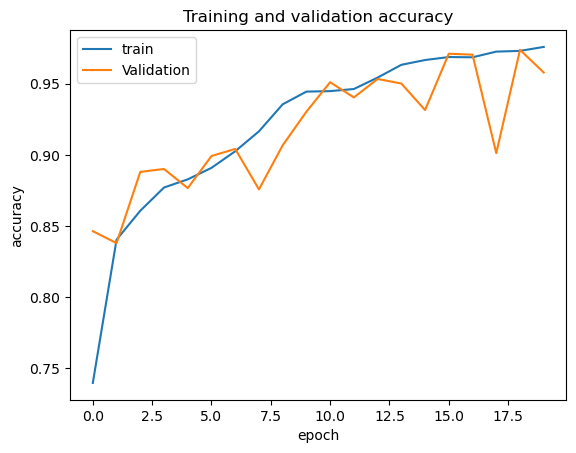

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 02:13:11.657741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:13:11.735056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 5s 20ms/step
f1_score =  0.9623570453603439
0.9619377162629758
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2123
           1       1.00      0.97      0.99      1710
           2       0.90      0.86      0.88       614
           3       0.83      0.96      0.89       502
           4       0.96      0.97      0.97       300
           5       0.94      0.96      0.95       242

    accuracy                           0.96      5491
   macro avg       0.94      0.95      0.94      5491
weighted avg       0.96      0.96      0.96      5491



<Axes: >

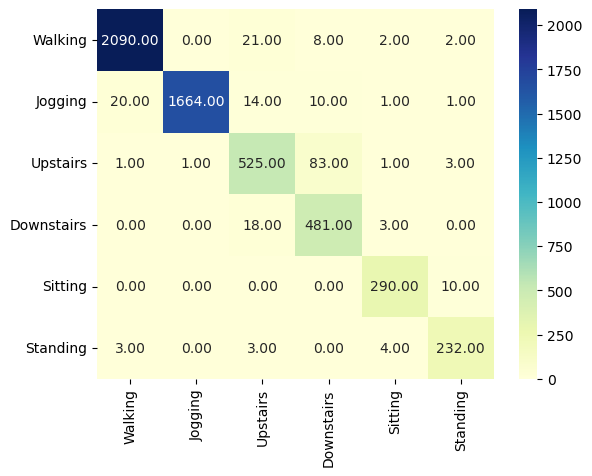

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [37]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_11 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 dropout_10 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                      

In [38]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 02:14:40.882155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:14:41.083997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:14:41.829950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7620 - accuracy: 0.7166

2024-05-01 02:15:00.518033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:15:00.604415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 68ms/step - loss: 0.7620 - accuracy: 0.7166 - val_loss: 0.5116 - val_accuracy: 0.7987
Epoch 2/20
275/275 [==============================] - 14s 52ms/step - loss: 0.4541 - accuracy: 0.8357 - val_loss: 0.3423 - val_accuracy: 0.8750
Epoch 3/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3490 - accuracy: 0.8656 - val_loss: 0.2657 - val_accuracy: 0.8959
Epoch 4/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2961 - accuracy: 0.8836 - val_loss: 0.2798 - val_accuracy: 0.8821
Epoch 5/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2669 - accuracy: 0.8913 - val_loss: 0.3084 - val_accuracy: 0.8755
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2608 - accuracy: 0.8974 - val_loss: 0.2099 - val_accuracy: 0.9151
Epoch 7/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2199 - accuracy: 0.9153 - val_loss: 0.4784 - val_accuracy: 0.8274
Epo

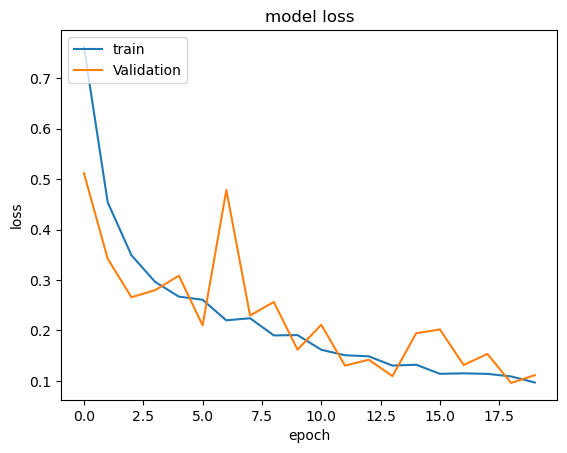

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

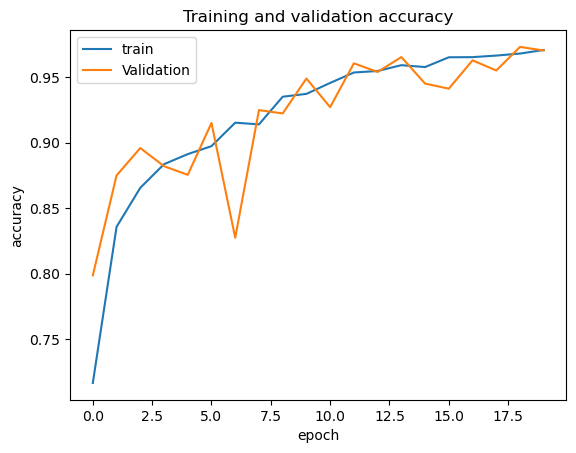

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 02:20:08.280892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:20:08.363600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9720292023110493
0.9717719905299581
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.89      0.92      0.90       614
           3       0.90      0.93      0.92       502
           4       0.97      1.00      0.98       300
           5       0.97      0.95      0.96       242

    accuracy                           0.97      5491
   macro avg       0.95      0.96      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

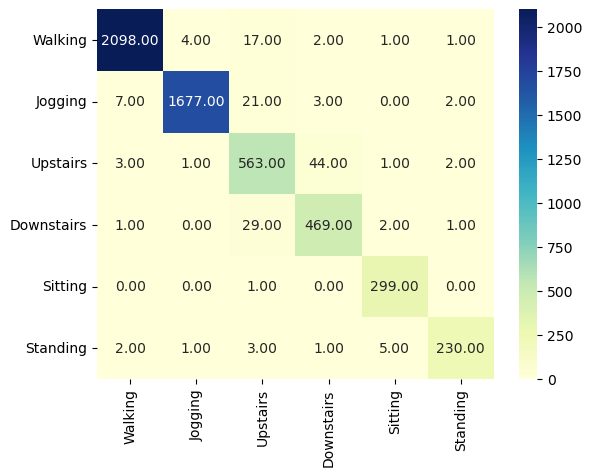

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [42]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_13 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 dropout_12 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                      

In [43]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 02:21:10.099813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:21:10.305896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:21:11.064688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.8005 - accuracy: 0.7061

2024-05-01 02:21:29.926344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:21:30.013706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 24s 69ms/step - loss: 0.8005 - accuracy: 0.7061 - val_loss: 0.5970 - val_accuracy: 0.8042
Epoch 2/20
275/275 [==============================] - 14s 52ms/step - loss: 0.4453 - accuracy: 0.8378 - val_loss: 0.3883 - val_accuracy: 0.8525
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.3779 - accuracy: 0.8557 - val_loss: 0.3488 - val_accuracy: 0.8636
Epoch 4/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3251 - accuracy: 0.8718 - val_loss: 0.4205 - val_accuracy: 0.8488
Epoch 5/20
275/275 [==============================] - 14s 51ms/step - loss: 0.3047 - accuracy: 0.8780 - val_loss: 0.2737 - val_accuracy: 0.8868
Epoch 6/20
275/275 [==============================] - 14s 51ms/step - loss: 0.2873 - accuracy: 0.8834 - val_loss: 0.2627 - val_accuracy: 0.8971
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.3478 - accuracy: 0.8652 - val_loss: 0.2891 - val_accuracy: 0.8796
Epo

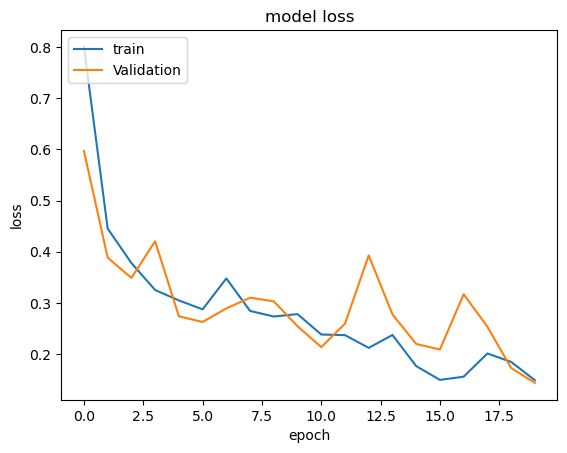

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

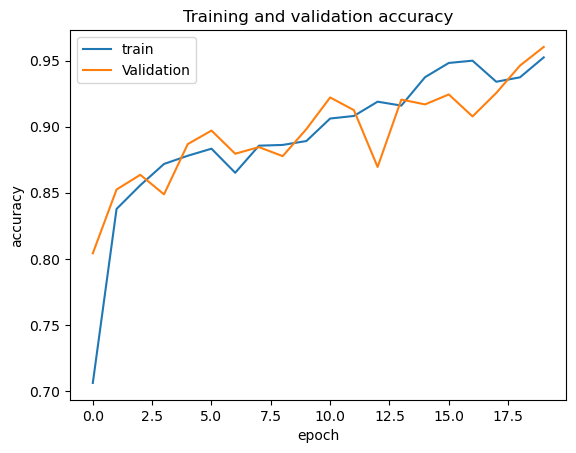

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 02:26:27.660564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 02:26:27.748963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9658563821789822
0.9657621562556912
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.89      0.90      0.89       614
           3       0.88      0.88      0.88       502
           4       0.97      0.97      0.97       300
           5       0.95      0.95      0.95       242

    accuracy                           0.97      5491
   macro avg       0.95      0.95      0.95      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

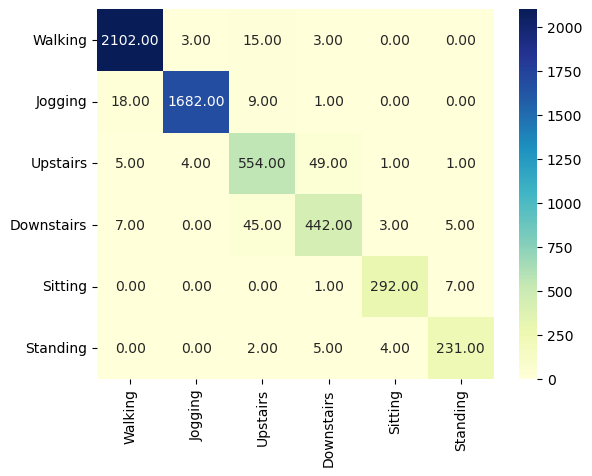

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')